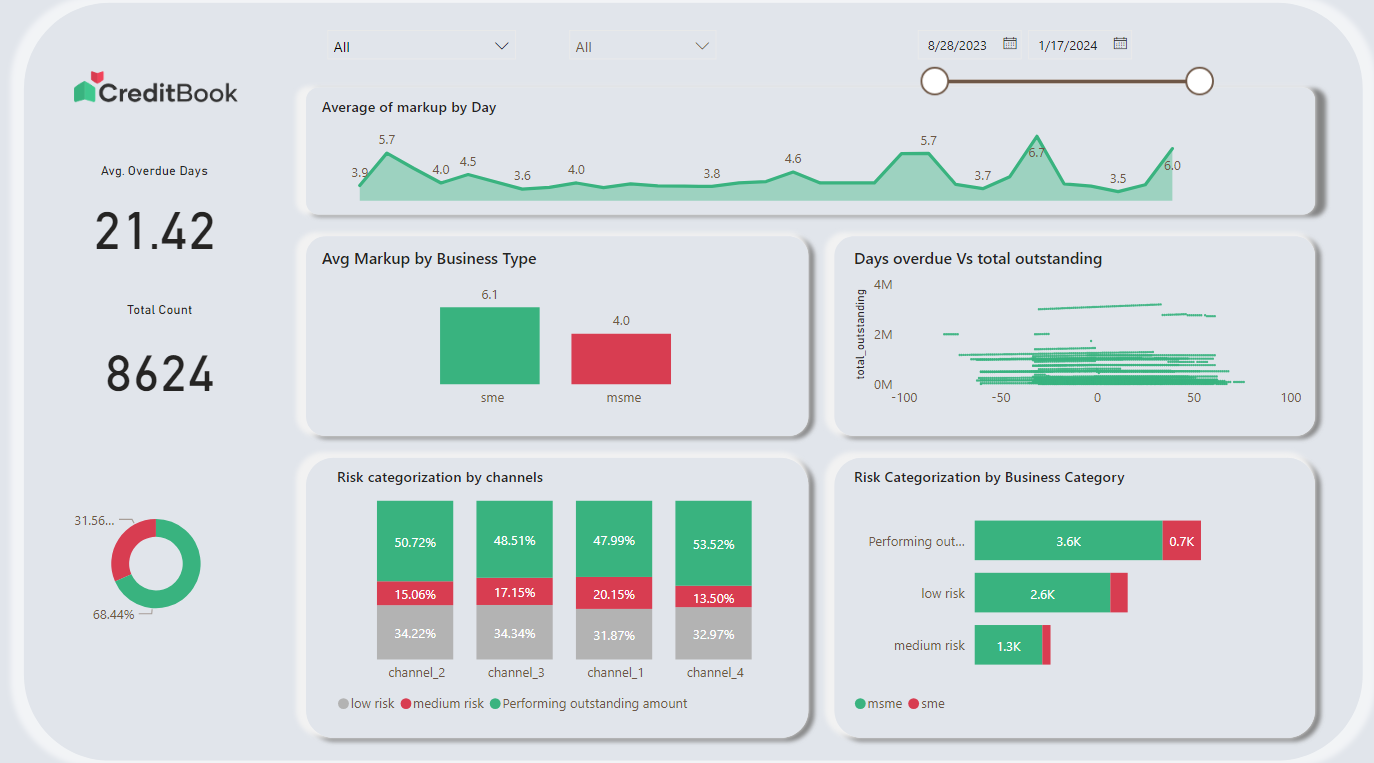

<h2>   
    <font color="#39b37f">
        <span style="font-family: Georgia;">
            <a href="https://app.powerbi.com/view?r=eyJrIjoiODUzNTgwNzAtODIzMi00NWUzLTk0ZmItZTEwODY1MmFlNzVhIiwidCI6ImU4YWUyNGZkLWFiMzQtNGQ2Ny05OWE4LWYzODMyMzExNTQxMCIsImMiOjl9" target="_blank" rel="noopener noreferrer">
                Click Here to Access Above Report
            </a>
        </span>   
    </font>    
</h2>


<a id="intro"></a>
<h2>   
      <font color = #39b37f >
            <span style='font-family:Georgia'>
            1. Introduction:
            </span>   
        </font>    
</h2>

<h3 >   
      <font color = #39b37f >
            <span style='font-family:Georgia'>
            Introduction:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
    This case study aims to give an idea of applying EDA in a real business scenario. This case study delves into the journey of CreditBook, examining its growth trajectory, key features, and the impact it has had on the financial landscape of Pakistan. Through data exploration, trend analysis, and uncovering insightful patterns,
    </span>
</p>   
<hr>
<h3>
    <font color = #39b37f >
        <span style='font-family:Georgia'>
            Business Understanding:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
    The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specializes in lending various types of loans to urban customers. You have to use EDA to analyze the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.<br>
        When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
    </span>
</p>
<ul>
    <span style='font-family:Georgia'>
        <li>If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company</li>
        <li>If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.</li>
    </span>
</ul>
    
<p><span style='font-family:Georgia'>The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:</span></p>
<ul>
    <span style='font-family:Georgia'>
        <li><b>The client with payment difficulties:</b> he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample</li>
        <li><b>All other cases:</b> All other cases when the payment is paid on time</li>
    </span>
</ul>
    

</ol>
<hr>
<h3>   
      <font color = #39b37fs >
            <span style='font-family:Georgia'>
            Business Objective:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
        This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.<br>
        In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. This case study aims to analyze the effectiveness of CreditBook in achieving its core business objective of enhancing the financial outcomes of small and medium businesses (SMBs) across Pakistan. By exploring trends, insights, and user behaviors within the platform, the study seeks to provide actionable insights that can inform strategic decision-making for CreditBook, ensuring continued growth and relevance in the competitive fin-tech landscape.
    </span>
</p>

<a id="libraries"></a>
<h2>   
      <font color = #39b37f >
            <span style='font-family:Georgia'>
            2. Getting Jupyter Ready:
            </span>   
        </font>    
</h2>

<h3 name='libraries'>   
      <font color = #d83d51 >
            <span style='font-family:Georgia'>
            2.1 Import Python Libraries:
            </span>   
        </font>    
</h3>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive


<a id="import"></a>
<h2>   
      <font color = #39b37f >
            <span style='font-family:Georgia'>
            3. Reading & Understanding the data
            </span>   
        </font>    
</h2>

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


<a id="input"></a>
<h3 name='libraries'>   
      <font color = #d83d51 >
            <span style='font-family:Georgia'>
            3.1 Importing the input files
            </span>   
        </font>    
</h3>

In [ ]:
daily_loan = pd.read_csv('/content/drive/MyDrive/DataRead/Credit_book/daily_loan_book.csv')
loans = pd.read_csv('/content/drive/MyDrive/DataRead/Credit_book/loans.csv')

<a id="inspect"></a>
<h3 name='libraries'>   
      <font color = #d83d51 >
            <span style='font-family:Georgia'>
            3.2 Merging & Filtering DataFrames
            </span>   
        </font>    
</h3>

There are a couple of null total outstanding values in  the dataset which I've assumed that those loan amounts are completely recovered from the clients So, I have focused on amounts which are pending yet to be recovered or have surpassed the due date \\
I've also merged two datasets together on unique id to easy analysis


In [ ]:
## data merging
df = pd.merge(daily_loan,loans, on='unique_id',how = 'inner')
filtered_df  = df[df['total_outstanding']>0] # assuming that total outstanding with 0 amount that the  amount has been raceived

In [ ]:
filtered_df.head(3)

,unique_id,pending_markup_fee,pending_principal,total_outstanding,date,user_id,business_type,channel,principal_amount,disbursement_date,due_date,markup
6,49a758ca-c689-4bd9-b997-382015a897b8,6000,200000,206000,2023-11-16 00:00:00,6486f943254f5eb42abc3096,sme,channel_2,200000,10/13/2023 5:00,11/12/2023 5:00,3.0
7,49a758ca-c689-4bd9-b997-382015a897b8,6000,200000,206000,2023-11-17 00:00:00,6486f943254f5eb42abc3096,sme,channel_2,200000,10/13/2023 5:00,11/12/2023 5:00,3.0
8,49a758ca-c689-4bd9-b997-382015a897b8,6000,200000,206000,2023-11-14 00:00:00,6486f943254f5eb42abc3096,sme,channel_2,200000,10/13/2023 5:00,11/12/2023 5:00,3.0


In [ ]:
filtered_df.dtypes

unique_id              object
pending_markup_fee      int64
pending_principal       int64
total_outstanding       int64
date                   object
user_id                object
business_type          object
channel                object
principal_amount        int64
disbursement_date      object
due_date               object
markup                float64
dtype: object

<a id="inspect"></a>
<h3 name='libraries'>   
      <font color = #d83d51 >
            <span style='font-family:Georgia'>
            3.3 Converting Date from oject to datetime datatype
            </span>   
        </font>    
</h3>

Originally, The python recognized the date columns as object so, it's important to convert them into datetime datatypes

In [ ]:

filtered_df[['date', 'disbursement_date', 'due_date']]= filtered_df[['date', 'disbursement_date', 'due_date']].apply(pd.to_datetime)

<ipython-input-7-8f0eaeae5f04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['date', 'disbursement_date', 'due_date']]= filtered_df[['date', 'disbursement_date', 'due_date']].apply(pd.to_datetime)


<a id="clean"></a>
<h2>   
      <font color = #39b37f >
            <span style='font-family:Georgia'>
            4. Data Exploration & Analysis
            </span>   
        </font>    
</h2>

<a id="null"></a>
<h3>   
      <font color = #d83d51 >
            <span style='font-family:Georgia'>
            4.1 data description and Outliers Check
            </span>   
      

**Skewness:**

Skewness measures the asymmetry of a probability distribution. A skewness value of 0 indicates a perfectly symmetrical distribution. If skewness is negative, the distribution is skewed to the left (left-tailed) with the tail on the left side longer or fatter than the right. If skewness is positive, the distribution is skewed to the right (right-tailed) with the tail on the right side longer or fatter than the left. Skewness helps identify whether the data is concentrated more on one side than the other.

**Kurtosis:**

measures the "tailedness" or the sharpness of the peak of a probability distribution. A kurtosis value of 3 in a normal distribution indicates mesokurtic (normal) behavior. If kurtosis is less than 3, the distribution is called platykurtic, and the tails are shorter and thinner than the normal distribution. If kurtosis is greater than 3, the distribution is called leptokurtic, and the tails are longer and fatter than the normal distribution. Kurtosis helps identify the presence of outliers and the overall shape of the distribution.

Skewness: 5.0244449064283545
Kurtosis: 37.663474472901335
count      8624.000000
mean       8496.683673
std       15149.567841
min           0.000000
25%        1600.000000
50%        3000.000000
75%        9334.000000
max      192000.000000
Name: pending_markup_fee, dtype: float64


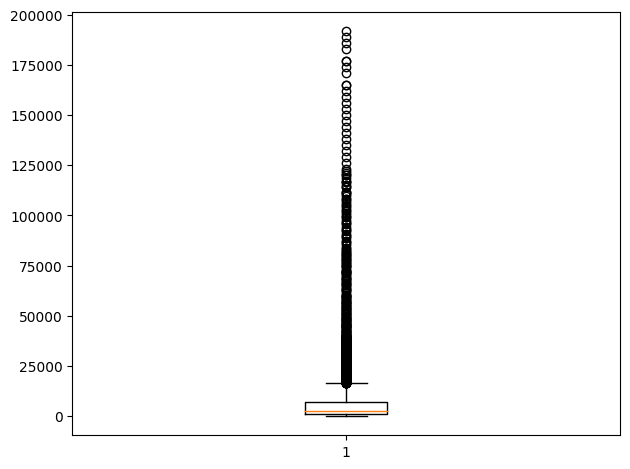

Skewness: 3.1935111413420767
Kurtosis: 14.151083338381241
count    8.624000e+03
mean     2.824865e+05
std      4.292095e+05
min      0.000000e+00
25%      5.000000e+04
50%      1.000000e+05
75%      3.000000e+05
max      3.000000e+06
Name: pending_principal, dtype: float64


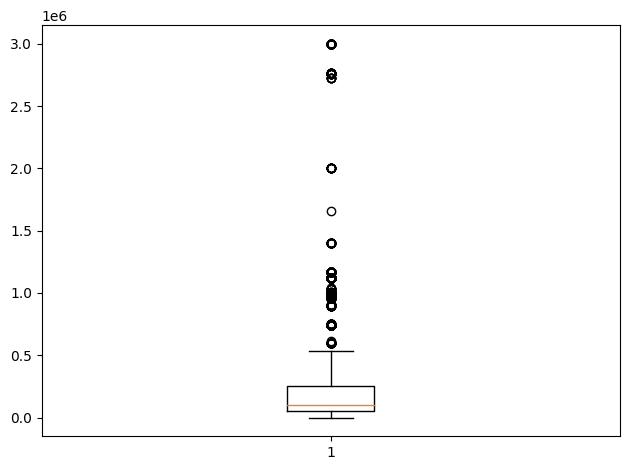

Skewness: 3.193523222258011
Kurtosis: 14.188917853340115
count    8.624000e+03
mean     2.909832e+05
std      4.399656e+05
min      6.700000e+01
25%      5.200000e+04
50%      1.040000e+05
75%      3.017000e+05
max      3.192000e+06
Name: total_outstanding, dtype: float64


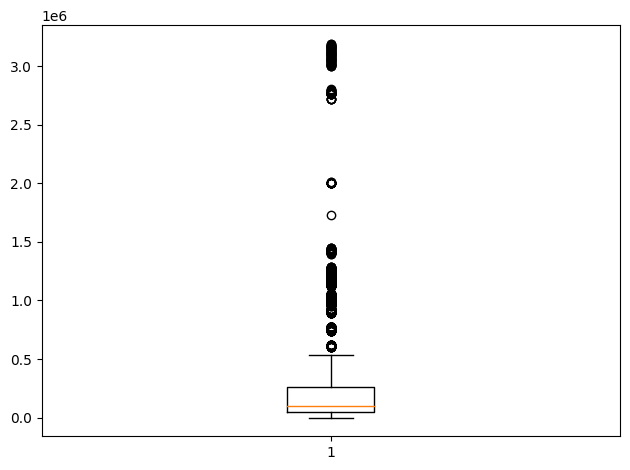

Skewness: 2.9834213172351722
Kurtosis: 12.441845492609357
count    8.624000e+03
mean     3.185719e+05
std      4.465261e+05
min      4.000000e+04
25%      5.000000e+04
50%      1.168500e+05
75%      4.972500e+05
max      3.000000e+06
Name: principal_amount, dtype: float64


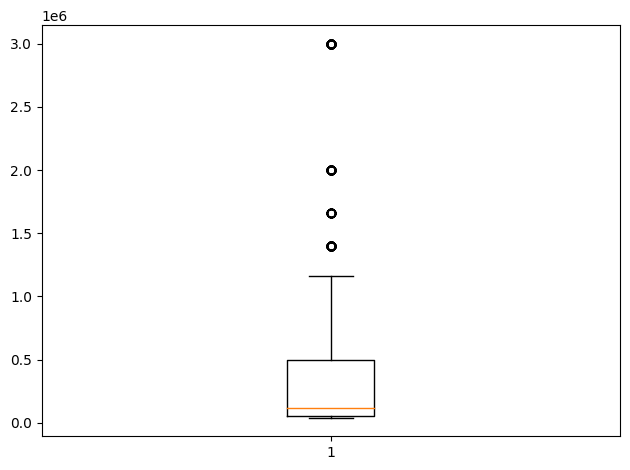

Skewness: 2.123535685989572
Kurtosis: 3.326967456638699
count    8624.000000
mean        4.288741
std         1.139019
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         8.000000
Name: markup, dtype: float64


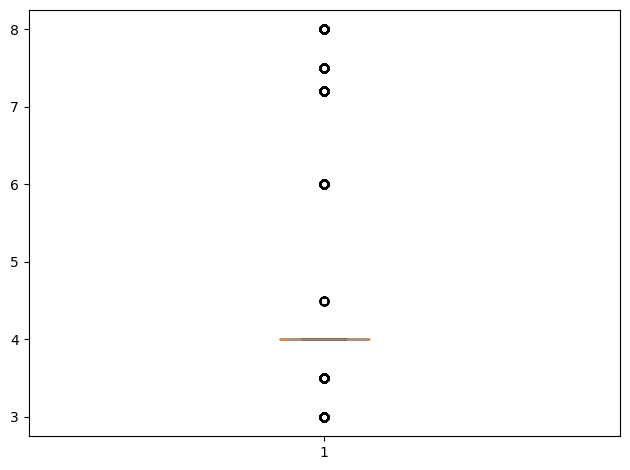

In [ ]:

for i in filtered_df.select_dtypes(include='number').columns:
    print("Skewness:" ,filtered_df[i].skew())
    print("Kurtosis:" ,filtered_df[i].kurtosis())
    print(filtered_df[i].describe())
    plt.boxplot(df[i])
    plt.tight_layout()
    plt.show()




<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Upon analyzing the dataset of CreditBook, it becomes evident that there are outliers present within the data. These outliers represent data points that significantly deviate from the typical pattern or distribution observed in the dataset.<br>
        The presence of outliers can heavily impact the mean value calculated from the dataset. Since the mean is sensitive to extreme values, outliers can skew the average towards their direction.
    </span>    
</div>

<a id="qq"></a>
<h3>   
      <font color = #d83d51 >
            <span style='font-family:Georgia'>
            4.2 Pair-Plot
            </span>   
        </font>    
</h3>

The 'kind='reg'' parameter in the code specifies the type of plot to be displayed within each subplot. In this case, 'reg' stands for regression plot. The regression plot includes a scatterplot of the data points along with a fitted regression line, providing a visual representation of the linear relationship between the two numerical variables. This helps in identifying trends, correlations, and the overall direction of the relationship between the paired variables.

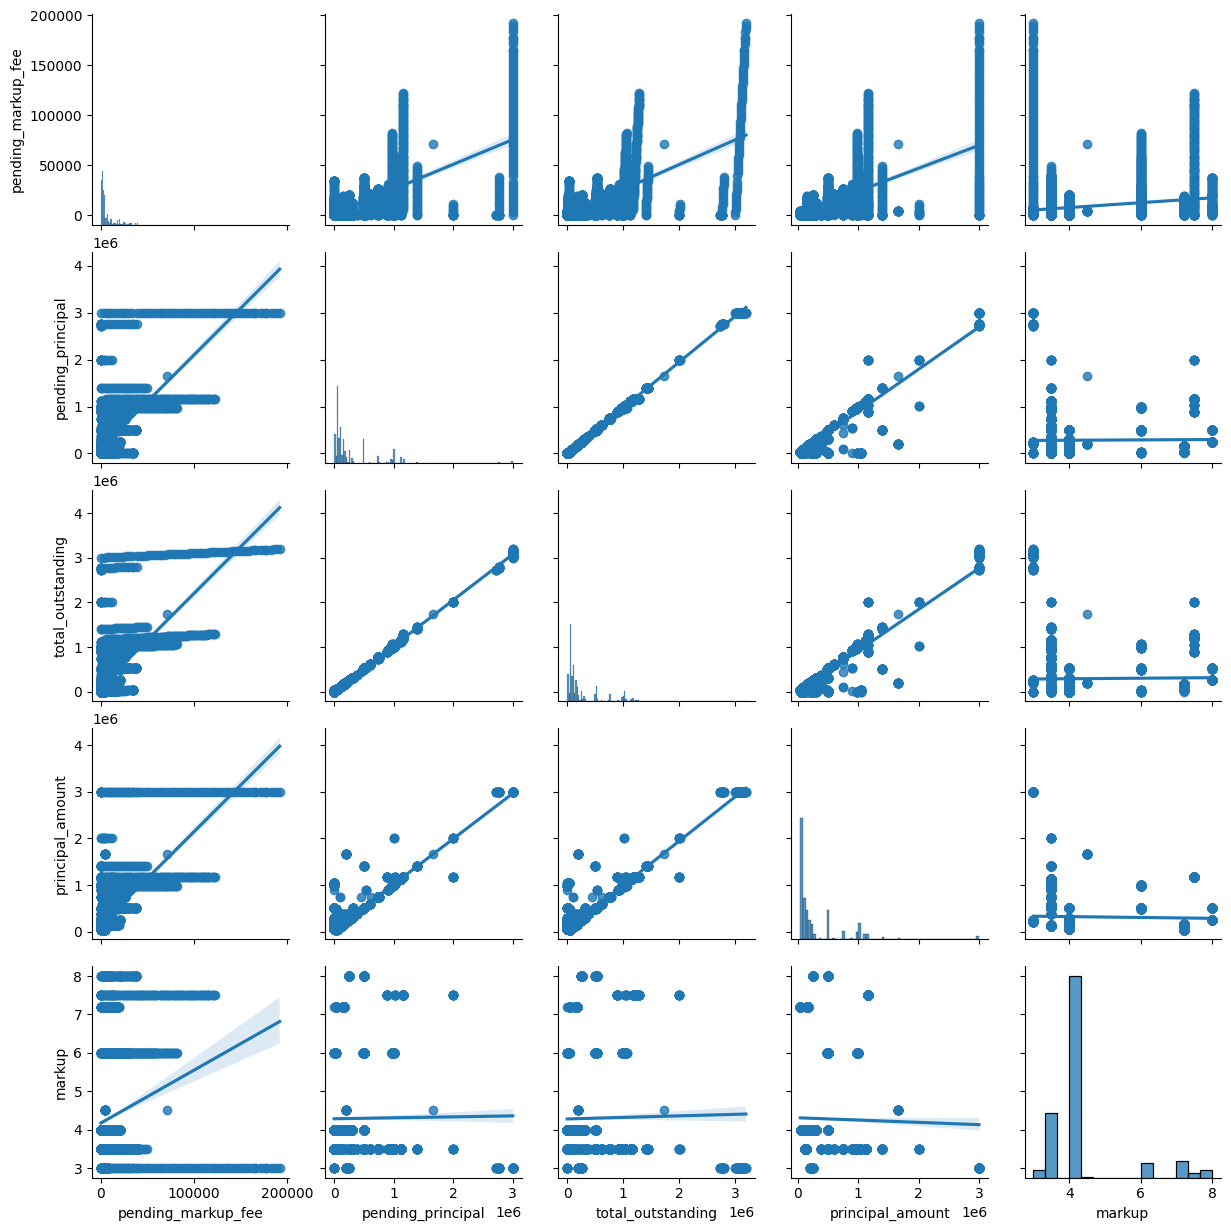

In [ ]:
numerical = filtered_df[['pending_markup_fee','pending_principal','total_outstanding','principal_amount','markup']]
sns.pairplot(numerical,kind = 'reg')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>By the look of this pair plot. It seems to have a positive relationship among variables. Except Markup,It has slight negatively related with other variables.<br>
         There is a slight negative relationship between markup and other variables which can be concluded that the more markup is causing less lending as the the line is slightly non-linear for principal amount   

        
  
</div>

<a id="null"></a>
<h3>   
      <font color = #d83d51 >
            <span style='font-family:Georgia'>
            4.2 Pair-Grid
            </span>   
        </font>    
</h3>

Pair grid is pretty much like the above graph, but it adds more context

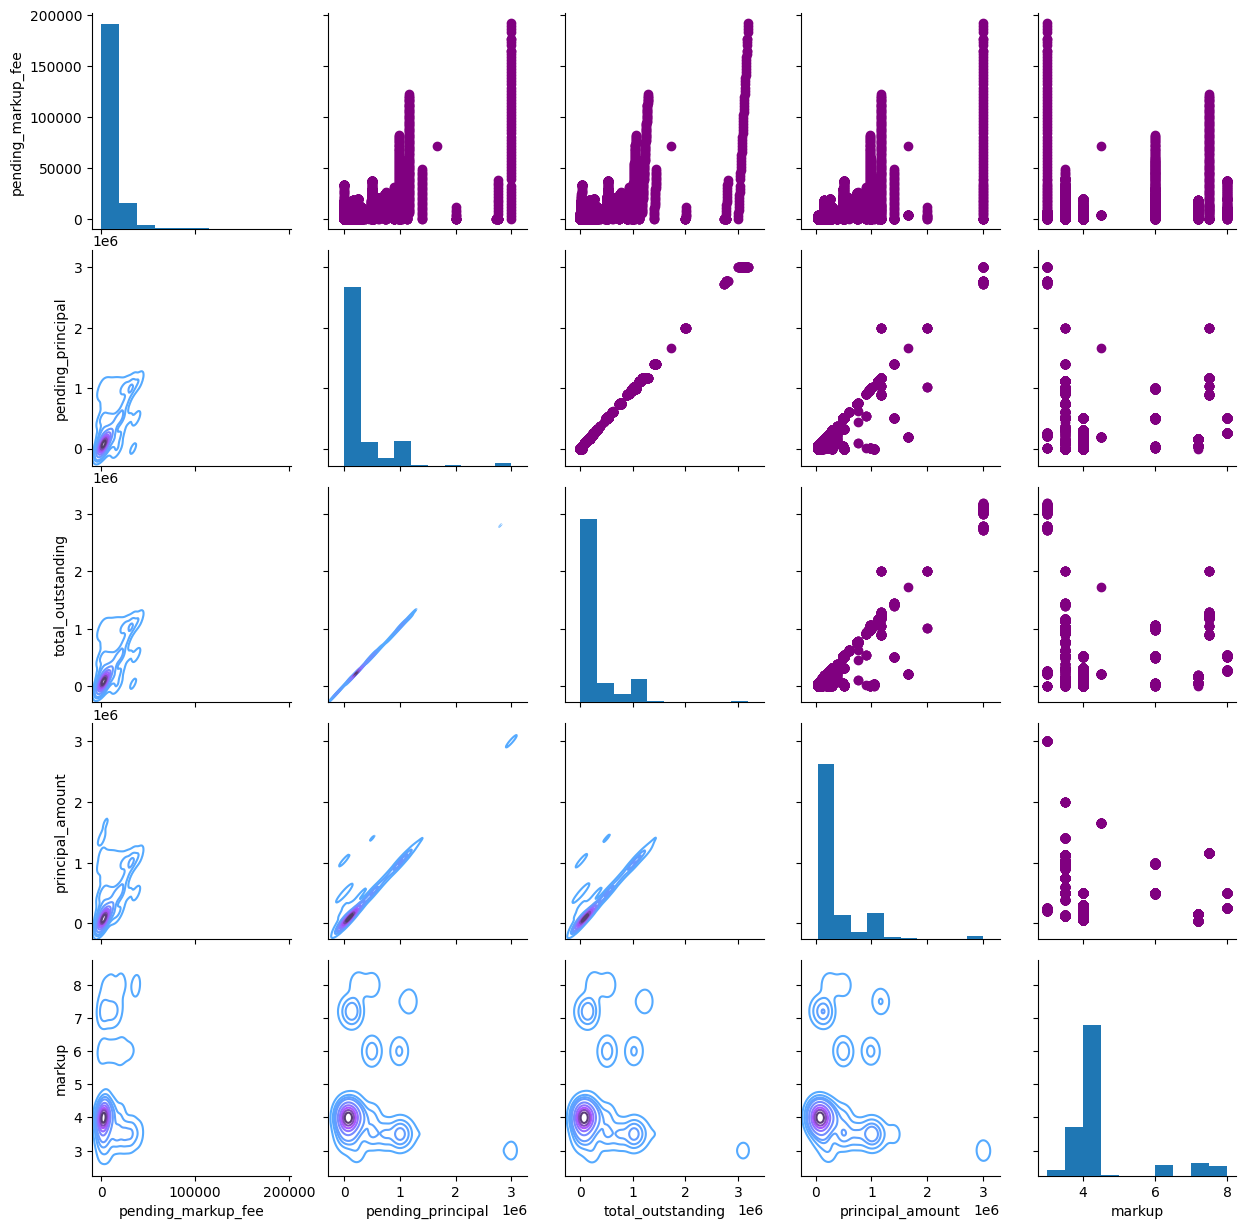

In [ ]:
return_fig = sns.PairGrid(numerical)

return_fig.map_upper(plt.scatter,color='purple')
return_fig.map_lower(sns.kdeplot,cmap = 'cool_d')
return_fig.map_diag(plt.hist,bins = 10)
# plt.savefig('pairgird.png')

<a id="null"></a>
<h3>   
      <font color = #d83d51 >
            <span style='font-family:Georgia'>
            4.2 Data Distribution
            </span>   
        </font>    
</h3>

The overall purpose of this code is to generate histograms with KDEs overlaid for each numerical column in the numerical DataFrame, allowing for a quick visual inspection of the distribution of values in each column. This is useful for understanding the characteristics and patterns present in the data.

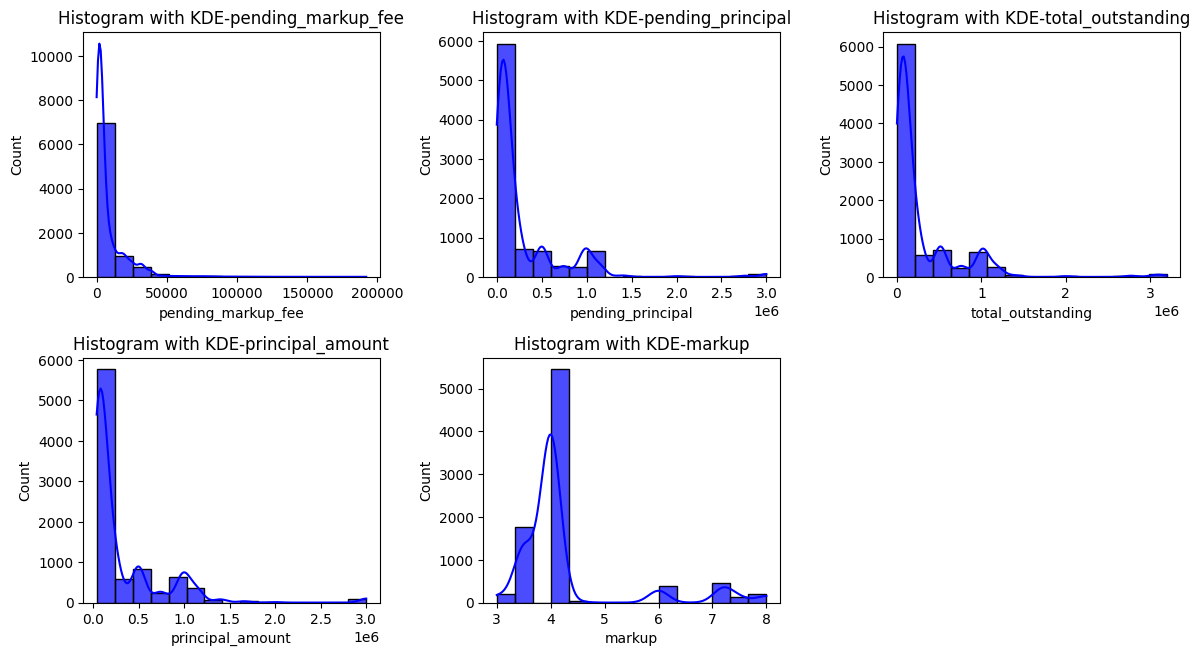

In [ ]:

plt.figure(figsize=(12,16))
for i , column in enumerate(numerical.columns):
    plt.subplot(5,3,i+1)
    sns.histplot(numerical[column],kde=True,bins=15,color="Blue",alpha =0.7)
    plt.title(f"Histogram with KDE-{column}")
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
         The distribution of loan amounts is right-skewed.
         This means that there are more loans for smaller amounts and fewer loans for larger amounts.<br>There are a few loans with very high pending_principal values. The pending_principal refers to the remaining balance of the loan that the borrower has not yet paid off. The fact that there are a few bins with a high frequency at the end of the tail of the distribution suggests that there are a few loans with very high remaining balances.<br>
The distribution of markup appears to be bimodal. A bimodal distribution has two peaks, which suggests that there may be two distinct groups of loans with different markup rates.

</div>

<a id="null"></a>
<h3>   
      <font color = #d83d51 >
            <span style='font-family:Georgia'>
            4.3 QQ-Plot
            </span>   
        </font>    
</h3>

A quantile-quantile (QQ) plot, also known as a probability plot, is a graphical tool used to compare two probability distributions. It helps assess whether a dataset plausibly came from a specific theoretical distribution, such as a normal or exponential distribution. QQ plots are particularly useful in exploratory data analysis (EDA) and data visualization.

The purpose of a QQ plot is to compare the quantiles of two distributions. Quantiles divide a distribution into equal-sized proportions. For example, the quartiles of a distribution divide it into four equal-sized portions, and the deciles divide it into ten equal-sized portions.

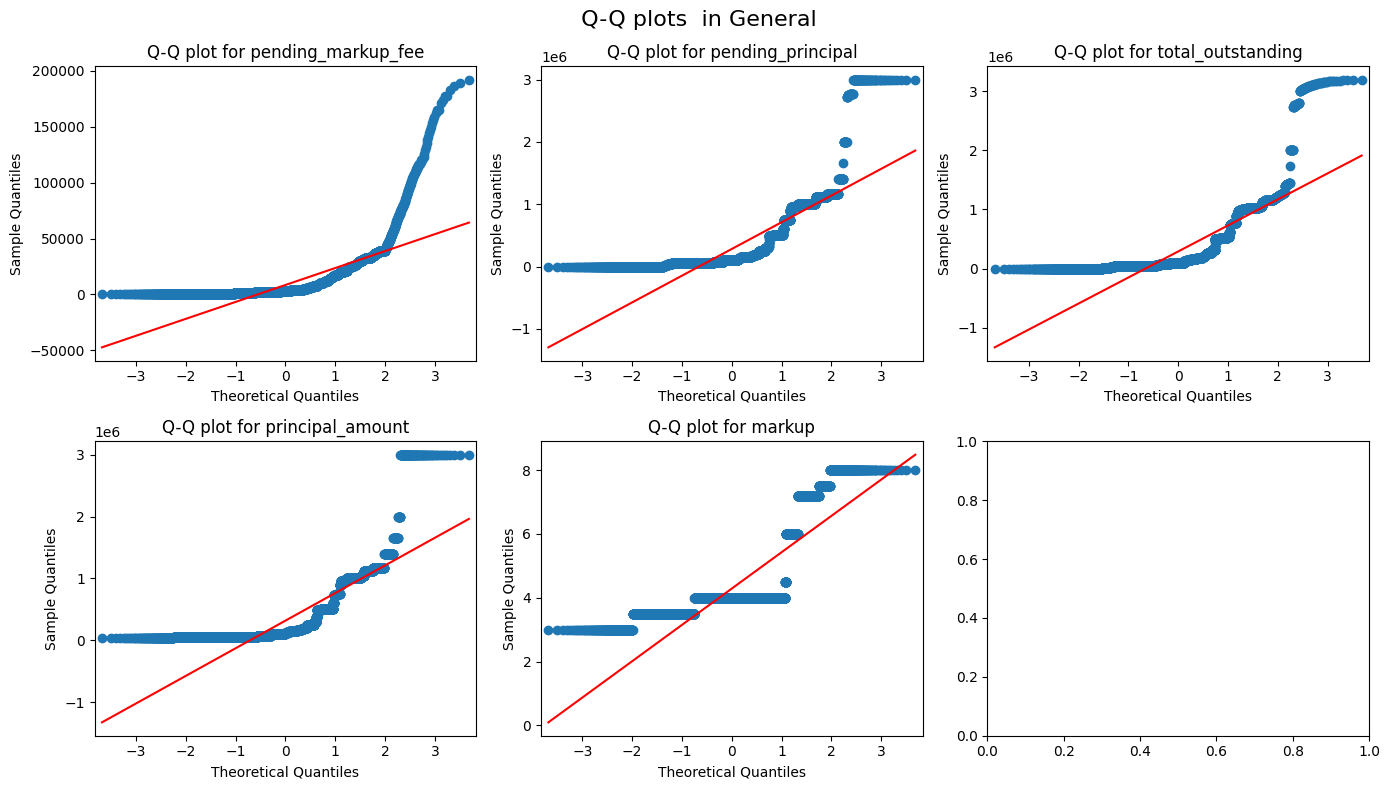

In [ ]:
import statsmodels.api as sm
feature_names = numerical.columns.tolist()

def make_univariate_plots(df, factors, title, plot_type):
    n = len(factors)
    ncols = 3
    nrows = (n + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4 * nrows))
    fig.suptitle(title, fontsize=16)

    for i, factor in enumerate(factors):
        ax = axes[i // ncols, i % ncols]
        sm.qqplot(df[factor], line='s', ax=ax)
        ax.set_title(f'Q-Q plot for {factor}')

    plt.tight_layout()
    plt.show()

make_univariate_plots(

    df=numerical,
    factors=feature_names,
    title=' Q-Q plots  in General',
    plot_type='qq-plot')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>None of the variables follow normal distribution by the look of this plot. Almost all variables are curving away from the diagonal line.<br>The QQ plot for markup shows a departure from normality, with a steeper slope in the middle and flatter tails, which suggests a possible bimodal distribution.

       
         

</div>

<a id="null"></a>
<h3>   
      <font color = #d83d51 >
            <span style='font-family:Georgia'>
            4.4 Correlation-Matrix
            </span>   
        </font>    
</h3>

A correlation matrix is a tabular representation that shows the correlation coefficients between multiple variables in a dataset. Each cell in the matrix displays the correlation between two variables, ranging from -1 to 1. A positive correlation (closer to 1) indicates a direct relationship, while a negative correlation (closer to -1) suggests an inverse relationship. A correlation of 0 implies no linear relationship. Correlation matrices are widely used in statistics and data analysis to identify patterns, associations, and dependencies between variables, aiding in the understanding of how variables change in relation to each other.

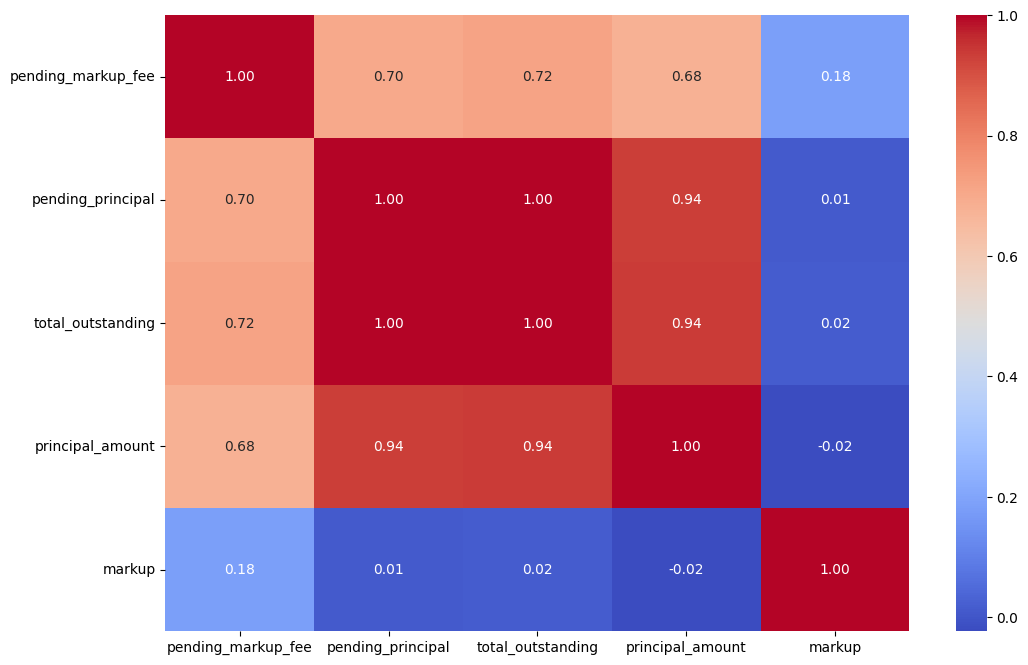

In [ ]:

correlation_matrix = filtered_df.select_dtypes(include='number').corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>There is a strong positive correlation between pending_markup_fee, pending_principal, total_outstanding, and principal_amount. This means that these features tend to increase together.<br>
        There is a weak positive correlation between markup and the other features. This means that there is a slight tendency for loans with higher markup rates to also have higher pending_principal, total_outstanding, and principal_amount.

       
         

</div>

<a id="clean"></a>
<h2>   
      <font color = #39b37f >
            <span style='font-family:Georgia'>
            5. Feature Engieering
            </span>   
        </font>    
</h2>

<a id="null"></a>
<h3>   
      <font color = #d83d51 >
            <span style='font-family:Georgia'>
            5.1 Over Due Days Extraction
            </span>   
        </font>    
</h3>

This code calculates the difference in days between two date columns, 'date' and 'due_date', and assigns the result to a new column called 'overdue_in_days' in the DataFrame 'filtered_df'. This calculation is typically used to determine how many days overdue a certain task or event is based on its due date compared to the current date.






In [ ]:
## extracting days difference_
filtered_df['overdue_in_days'] = (filtered_df['date']-filtered_df['due_date']).dt.days

<ipython-input-14-9a18b255ba82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['overdue_in_days'] = (filtered_df['date']-filtered_df['due_date']).dt.days


<a id="null"></a>
<h3>   
      <font color = #d83d51 >
            <span style='font-family:Georgia'>
            5.2 Risk Classification
            </span>   
        </font>    
</h3>

This code defines a function called classify_risk which categorizes overdue days into different risk levels. It then creates a new column named 'risk_status' in the DataFrame 'filtered_df' based on the result of applying this classification function to the 'overdue_in_days' column. The classification assigns different risk statuses such as 'Performing outstanding amount', 'low risk', 'medium risk', 'high risk', or 'non-performing' based on the number of overdue days. This process helps in assessing the financial health or performance of entities based on their payment or task completion patterns.

In [ ]:
## categorizing risk based on overdue days

def classify_risk(days):
  if days <= 0:
    return 'Performing outstanding amount'

  elif days <= 30:
    return 'low risk'

  elif days >= 30:
    return 'medium risk'

  elif days >= 60:
    return 'high risk'

  elif days >= 90:
    return 'non performing'

## creating a new column based on risk classificatio
filtered_df['risk_status'] = filtered_df['overdue_in_days'].apply(classify_risk)


<ipython-input-15-78cb1f44bdfa>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['risk_status'] = filtered_df['overdue_in_days'].apply(classify_risk)


In [ ]:
filtered_df.head(5)

,unique_id,pending_markup_fee,pending_principal,total_outstanding,date,user_id,business_type,channel,principal_amount,disbursement_date,due_date,markup,overdue_in_days,risk_status
6,49a758ca-c689-4bd9-b997-382015a897b8,6000,200000,206000,2023-11-16,6486f943254f5eb42abc3096,sme,channel_2,200000,2023-10-13 05:00:00,2023-11-12 05:00:00,3.0,3,low risk
7,49a758ca-c689-4bd9-b997-382015a897b8,6000,200000,206000,2023-11-17,6486f943254f5eb42abc3096,sme,channel_2,200000,2023-10-13 05:00:00,2023-11-12 05:00:00,3.0,4,low risk
8,49a758ca-c689-4bd9-b997-382015a897b8,6000,200000,206000,2023-11-14,6486f943254f5eb42abc3096,sme,channel_2,200000,2023-10-13 05:00:00,2023-11-12 05:00:00,3.0,1,low risk
9,49a758ca-c689-4bd9-b997-382015a897b8,6000,200000,206000,2023-11-15,6486f943254f5eb42abc3096,sme,channel_2,200000,2023-10-13 05:00:00,2023-11-12 05:00:00,3.0,2,low risk
10,49a758ca-c689-4bd9-b997-382015a897b8,6000,200000,206000,2023-11-13,6486f943254f5eb42abc3096,sme,channel_2,200000,2023-10-13 05:00:00,2023-11-12 05:00:00,3.0,0,Performing outstanding amount


<a id="clean"></a>
<h2>   
      <font color = #39b37f >
            <span style='font-family:Georgia'>
            6. Data Trends
            </span>   
        </font>    
</h2>

<a id="null"></a>
<h3>   
      <font color = #d83d51 >
            <span style='font-family:Georgia'>
            6.1 Risk prevalence
            </span>   
        </font>    
</h3>

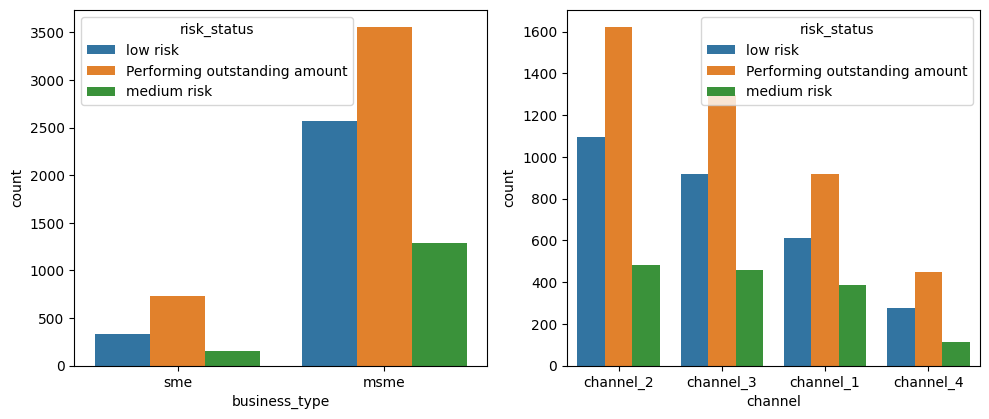

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.countplot(x='business_type', hue= 'risk_status', data = filtered_df)
plt.subplot(2,2,2)
sns.countplot(x = 'channel', hue = 'risk_status', data = filtered_df)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>

*   Most of the loans are performing loans in the dataset
*   The majority of loans in data set are granted to MSME
*   Channel_2 is used most of the time to grant loans to customer
*   Most of the loans fall under low risk category so far








       
         

</div>

<a id="null"></a>
<h3>   
      <font color = #d83d51 >
            <span style='font-family:Georgia'>
            6.2 Risk Factor in Percentage
            </span>   
        </font>    
</h3>

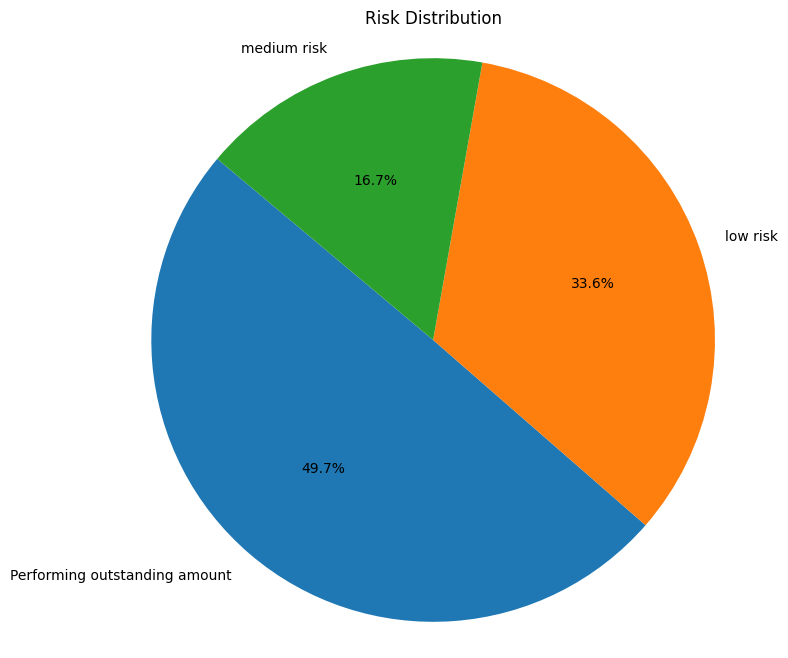

In [ ]:
categorical =  filtered_df[['business_type','channel','risk_status']]
category_counts = categorical['risk_status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Risk Distribution')
plt.axis('equal')

plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>



While 49.7% of customers are categorized as 'Performing outstanding', representing a significant portion, it's notable that 33.6% fall into the 'low risk' category. However, this warrants attention as these customers may transition to the 'Medium Risk' category over time. Additionally, loans classified as 'Medium risk' make up 16.7% of the total, but whether this is
percentage considered high or low  depends on the company's prioritization and risk tolerance.





       
         

</div>

<a id="null"></a>
<h3>   
      <font color = #d83d51 >
            <span style='font-family:Georgia'>
            6.3Distribution of pending principals overtime accross different business types
            </span>   
        </font>    
</h3>


The use of the median instead of the mean in these visualizations is a strategic choice, particularly due to the presence of outliers in the dataset. Unlike the mean, which is highly influenced by extreme values or outliers, the median is resistant to such effects. By using the median, these visualizations provide a more robust representation of the central tendency of the 'pending_principal' variable. This ensures that the plotted values are less skewed by extreme observations, allowing for a clearer depiction of the typical or central value of 'pending_principal' over time and across different business types. Therefore, employing the median enhances the reliability and interpretability of the visualizations, especially when dealing with datasets containing outliers.

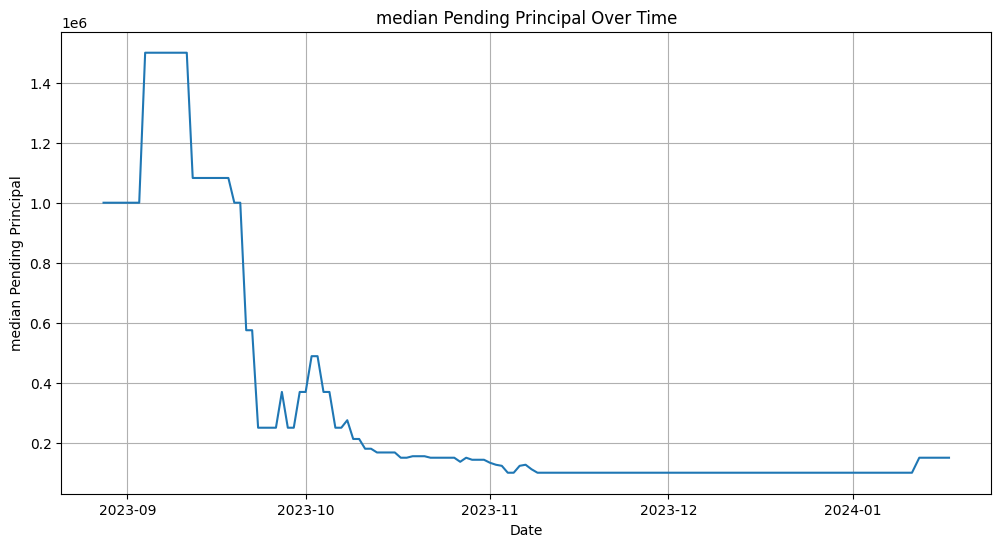

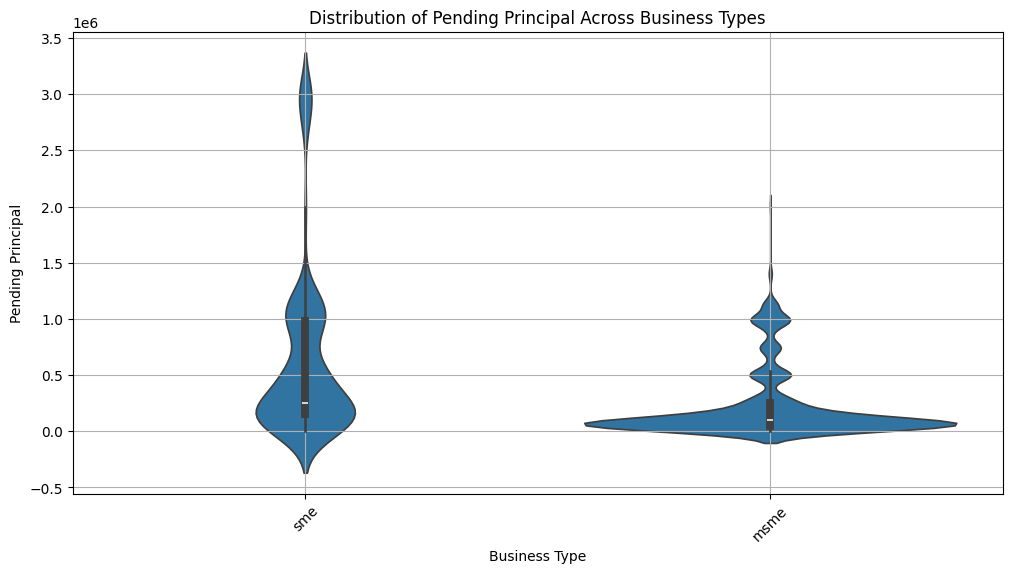

In [ ]:
# Plotting the distribution of 'pending_principal' over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='date', y='pending_principal', estimator='median', errorbar=None)
plt.title('median Pending Principal Over Time')
plt.xlabel('Date')
plt.ylabel('median Pending Principal')
plt.grid(True)
plt.show()

# Plotting the distribution of 'pending_principal' across different business types
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_df, x='business_type', y='pending_principal')
plt.title('Distribution of Pending Principal Across Business Types')
plt.xlabel('Business Type')
plt.ylabel('Pending Principal')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>The amount of pending principal reaches its peak in September 2023 but experiences a sudden decline in October, followed by a slight increase in October before decreasing again in November. After November, the trend seems to stabilize, with the line flattening out.<br><br> It's important to note that some Small and Medium Enterprises (SME) and Micro, Small, and Medium Enterprises (MSME) businesses might have significantly high outstanding loans, while others may have relatively lower outstanding loans.









       
         

</div>

<a id="null"></a>
<h3>   
      <font color = #d83d51 >
            <span style='font-family:Georgia'>
            6.4 Markup Movement
            </span>   
        </font>    
</h3>


This code aims to visualize the median markup rate across different business types over time. The resulting plot provides insights into how the median markup rate varies across different business types throughout the observed time period, allowing for the identification of trends or patterns in markup rates among various business categories.






Text(0, 0.5, 'Markup (%)')

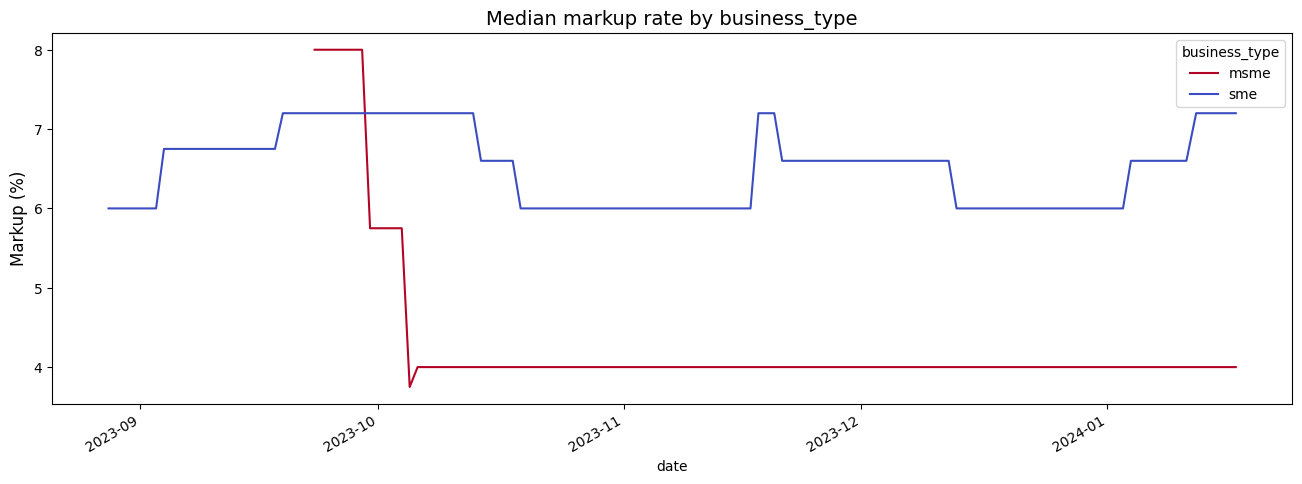

In [ ]:
fig = plt.figure(figsize=(16,12))
ax3 = fig.add_subplot(212)
cmap = plt.cm.coolwarm_r



by_interest = filtered_df.groupby(['date', 'business_type']).markup.median()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Median markup rate by business_type', fontsize=14)
ax3.set_ylabel('Markup (%)', fontsize=12)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Observing the graph provides valuable insights into the fluctuations of markup rates across various business types. In October 2023, there is a notable decrease in the markup for Micro, Small, and Medium Enterprises (MSME). <br>However, the markup for Small and Medium Enterprises (SME) exhibits frequent and significant variations, contributing to uncertainty. It's challenging to pinpoint the exact reasons behind these markup increases. Potential factors could include rising borrowing costs for lenders or reduced competition among them.









       
         

</div>

<a id="clean"></a>
<h2>   
      <font color = #39b37f >
            <span style='font-family:Georgia'>
            7. Conclusion
            </span>   
        </font>    
</h2>

In conclusion, the comprehensive analysis conducted on the dataset sheds light on various aspects of financial performance and risk across different business types. Through visualizations of pending principal amounts, markup rates, and risk classifications, key trends and patterns have been identified. The examination of pending principal amounts revealed fluctuations over time, with notable peaks and declines, while the analysis of markup rates highlighted significant changes, particularly in MSME and SME categories. Moreover, the risk classification process provided insights into customer overdue days, aiding in the assessment of financial risks. Overall, this analysis offers valuable insights into the dataset's financial dynamics, enabling informed decision-making and risk management strategies for businesses.

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b> suggestions: </b>
        <ul>
           <li>Implement policies that offer loans with lower markup rates. This can make borrowing more affordable for clients and attract more customers to your loan services.<li>
           Lengthen the duration of loans to provide clients with more flexibility in repayment. By offering longer repayment periods, clients can spread out their payments over a longer time frame, making it easier for them to manage their finances.<li>Develop a range of customized loan options that cater to different client needs. These options can be tailored based on factors such as loan duration, amount, and markup rates. Providing more choices allows clients to select loan packages that best suit their individual financial situations and preferences.
        </ul>
    </span>    
</div>